# Assignment 3B

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [9]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

In [4]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
import numpy as np

In [12]:
model.fit(x_train.astype(np.float32), y_train.astype(np.float32), epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 78s 44ms/step - accuracy: 0.7836 - loss: 5.6043 - val_accuracy: 0.8810 - val_loss: 0.3476
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 93s 55ms/step - accuracy: 0.8952 - loss: 0.2979 - val_accuracy: 0.8900 - val_loss: 0.3193
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.9090 - loss: 0.2516 - val_accuracy: 0.8910 - val_loss: 0.3188
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 98s 58ms/step - accuracy: 0.9176 - loss: 0.2213 - val_accuracy: 0.8907 - val_loss: 0.3276
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 139s 56ms/step - accuracy: 0.9214 - loss: 0.2089 - val_accuracy: 0.8880 - val_loss: 0.3600


In [13]:
loss, acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.8813 - loss: 0.3735


In [14]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']

In [21]:
predictions = model.predict(x_test[:1])

labels = labels[np.argmax(predictions)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


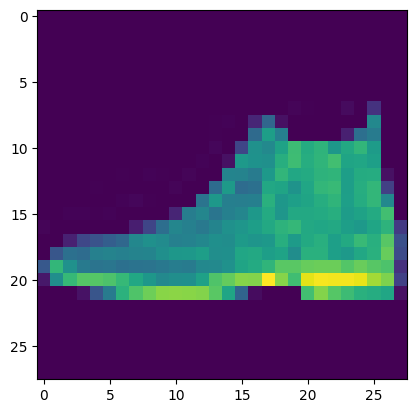

In [32]:
import matplotlib.pyplot as plt
plt.imshow(x_test[:1][0])
plt.show()